In [7]:
import cv2
import ipywidgets as widgets
import threading
from IPython.display import display, Image

### Haarcascades
For this feature, trained classifiers are used to detect objects, smiles, eyes, and so on.
> For more information checkout
> - https://github.com/opencv/opencv/tree/master/samples
> - https://repositorio.pascualbravo.edu.co/bitstream/pascualbravo/1788/1/Rep-IUPB_Tec_Ele_Rostros.pdf

In [8]:
face_cascade  = cv2.CascadeClassifier('./haarcascades/haarcascade_frontalface_default.xml')
smile_cascade = cv2.CascadeClassifier('./haarcascades/haarcascade_smile.xml')

In [9]:
video_path = "./smile_video.mp4" # if you want a LIVE test, comment this line and uncomment the line below
# video_path = 0

total_frames = 0
smiling_frames = 0

stopButton = widgets.ToggleButton(
    value=False,
    description='Stop',
    disabled=False,
    button_style='danger', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Description',
    icon='square'
)

def view(button):
    global total_frames, smiling_frames
    cap = cv2.VideoCapture(video_path)
    display_handle = display(None, display_id=True)
    while True:
        ret, frame = cap.read()
        if ret is None or frame is None:
            break
        total_frames += 1
        
        face_frame = frame.copy()
        gray = cv2.cvtColor(face_frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.2, minNeighbors=25) # scaleFactor & minNeighbors can be adjusted based on cam needs.

        for (x, y, w, h) in faces:
            cv2.rectangle(face_frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
            face_region = face_frame[y:y+h, x:x+w]
            gray_face = cv2.cvtColor(face_region, cv2.COLOR_BGR2GRAY)
            smiles = smile_cascade.detectMultiScale(gray_face, scaleFactor=1.25, minNeighbors=25)
            if len(smiles) > 0:
                print(f"SMILE DETECTED IN FRAME #{total_frames}")
                smiling_frames += 1
                first_smile = smiles[0]
                sx, sy, sw, sh = first_smile
                cv2.rectangle(face_region, (sx, sy), (sx + sw, sy + sh), (0, 255, 0), 5)
        
        _, buffer = cv2.imencode('.jpeg', face_frame)
        display_handle.update(Image(data=buffer.tobytes()))

        if stopButton.value == True:
            cap.release()
            display_handle.update(None)

ToggleButton(value=False, button_style='danger', description='Stop', icon='square', tooltip='Description')

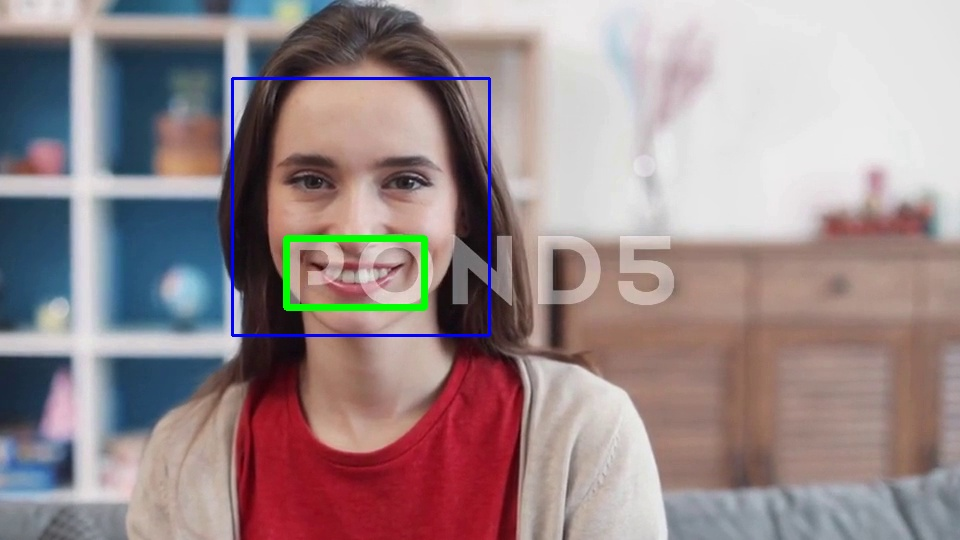

SMILE DETECTED IN FRAME #76
SMILE DETECTED IN FRAME #81
SMILE DETECTED IN FRAME #82
SMILE DETECTED IN FRAME #83
SMILE DETECTED IN FRAME #88
SMILE DETECTED IN FRAME #91
SMILE DETECTED IN FRAME #92
SMILE DETECTED IN FRAME #93
SMILE DETECTED IN FRAME #94
SMILE DETECTED IN FRAME #95
SMILE DETECTED IN FRAME #96
SMILE DETECTED IN FRAME #97
SMILE DETECTED IN FRAME #98
SMILE DETECTED IN FRAME #99
SMILE DETECTED IN FRAME #100
SMILE DETECTED IN FRAME #101
SMILE DETECTED IN FRAME #102
SMILE DETECTED IN FRAME #103
SMILE DETECTED IN FRAME #104
SMILE DETECTED IN FRAME #105
SMILE DETECTED IN FRAME #106
SMILE DETECTED IN FRAME #107
SMILE DETECTED IN FRAME #108
SMILE DETECTED IN FRAME #109
SMILE DETECTED IN FRAME #110
SMILE DETECTED IN FRAME #111
SMILE DETECTED IN FRAME #112
SMILE DETECTED IN FRAME #113
SMILE DETECTED IN FRAME #114
SMILE DETECTED IN FRAME #115
SMILE DETECTED IN FRAME #116
SMILE DETECTED IN FRAME #117
SMILE DETECTED IN FRAME #118
SMILE DETECTED IN FRAME #119
SMILE DETECTED IN FRAME #120

In [10]:
display(stopButton)
thread = threading.Thread(target=view, args=(stopButton,))
thread.start()